In [1]:
import pandas as pd

In [2]:
A=pd.read_csv("F:/datascience/Python/iris.csv")

In [3]:
A.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [39]:
A=A.drop(A.columns[[0]],axis=1)

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
B=A.apply(le.fit_transform)

In [41]:
B.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0


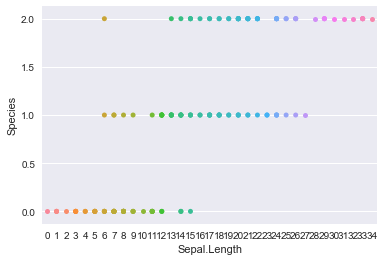

In [42]:
import seaborn as sb
%matplotlib inline
sb.stripplot(x=B['Sepal.Length'],y=B['Species'])

In [43]:
X = B[B.columns[~B.columns.isin(['Species'])]]
Y=B[['Species']]

In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
RC=RandomForestClassifier()

In [47]:
model=RC.fit(xtrain,ytrain)

C:\Users\N N kundan\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [49]:
pred=model.predict(xtest)

In [50]:
xtest['predicted']=pred
xtest['actual']=ytest
xtest

C:\Users\N N kundan\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\N N kundan\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,predicted,actual
73,18,7,23,8,1,1
18,14,17,7,2,0,0
118,33,5,42,19,2,2
78,17,8,21,11,1,1
76,25,7,24,10,1,1
31,11,13,5,3,0,0
64,13,8,12,9,1,1
141,26,10,27,19,2,2
68,19,1,21,11,1,1
82,15,6,15,8,1,1


In [51]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [52]:
cm=confusion_matrix(ytest,pred)

In [53]:
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [54]:
cr=classification_report(ytest,pred)

In [55]:
print(cr)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        30



In [56]:
ac=accuracy_score(ytest,pred)

In [57]:
ac

1.0